<a href="https://colab.research.google.com/github/contactewere/Breast-Cancer-Diagnosis/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('breast cancer wiscosin.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df =df.drop(['id'], axis =1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
correlation_matrix = df.corr()

<ipython-input-6-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


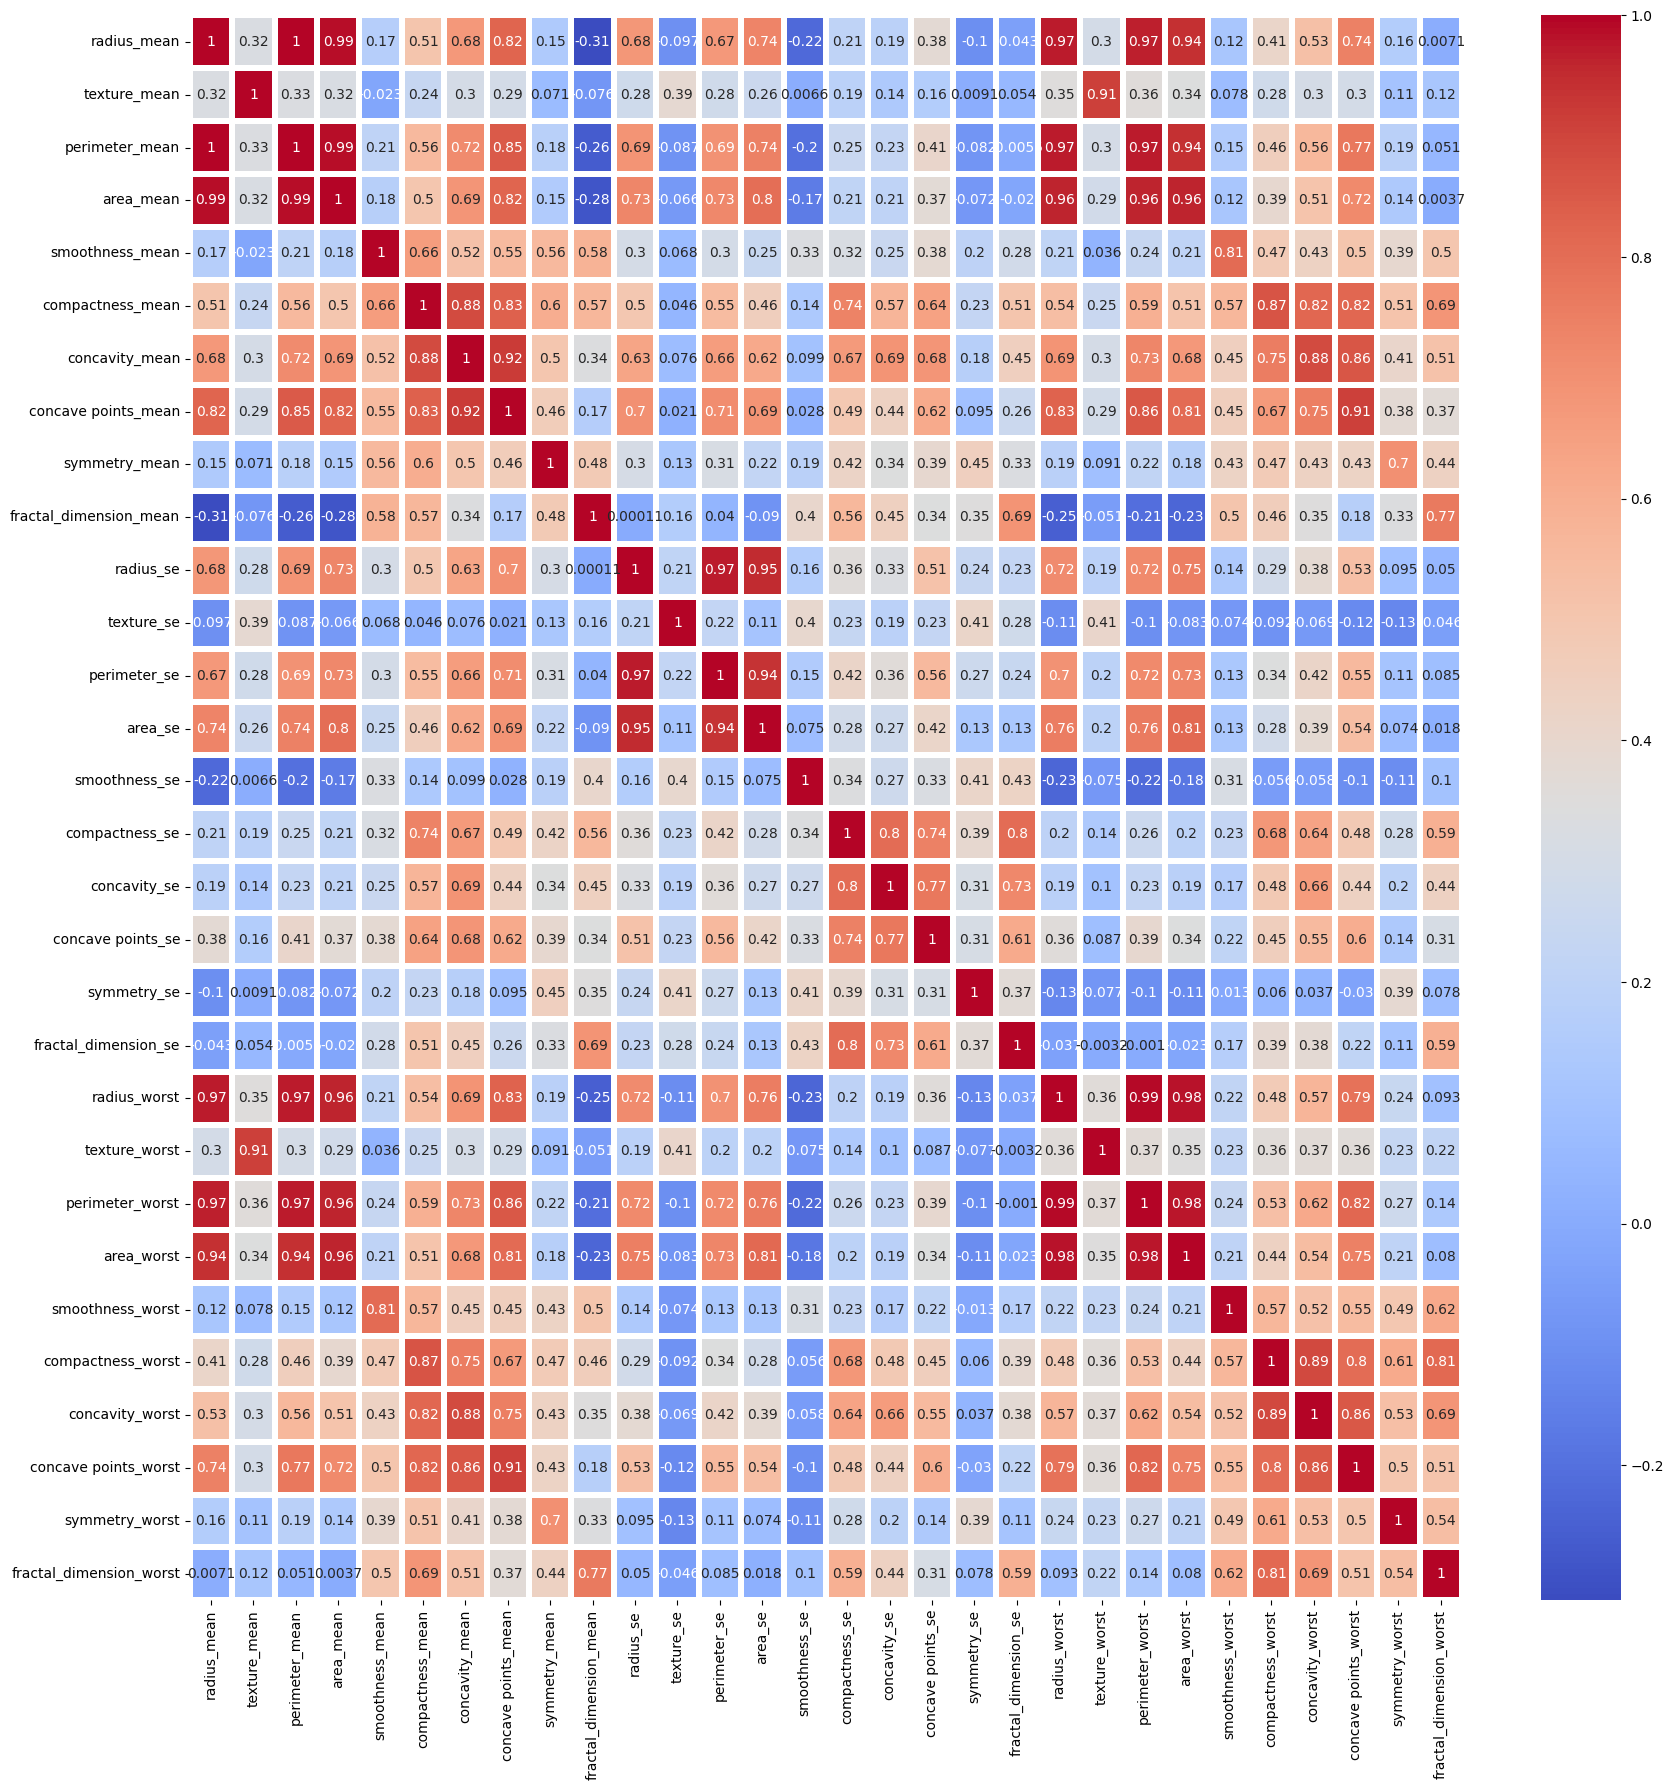

In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=3)
plt.tight_layout()

In [ ]:
threshold = 0.8
correlated_pairs = {}

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_pairs[colname] = correlation_matrix.columns[j]

In [ ]:
features_to_remove = set(correlated_pairs.keys())
df_reduced = df.drop(columns=features_to_remove)

In [ ]:
df_reduced.head(5)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364


In [ ]:
cm = df_reduced.corr()

<ipython-input-11-1ebe8e242752>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df_reduced.corr()


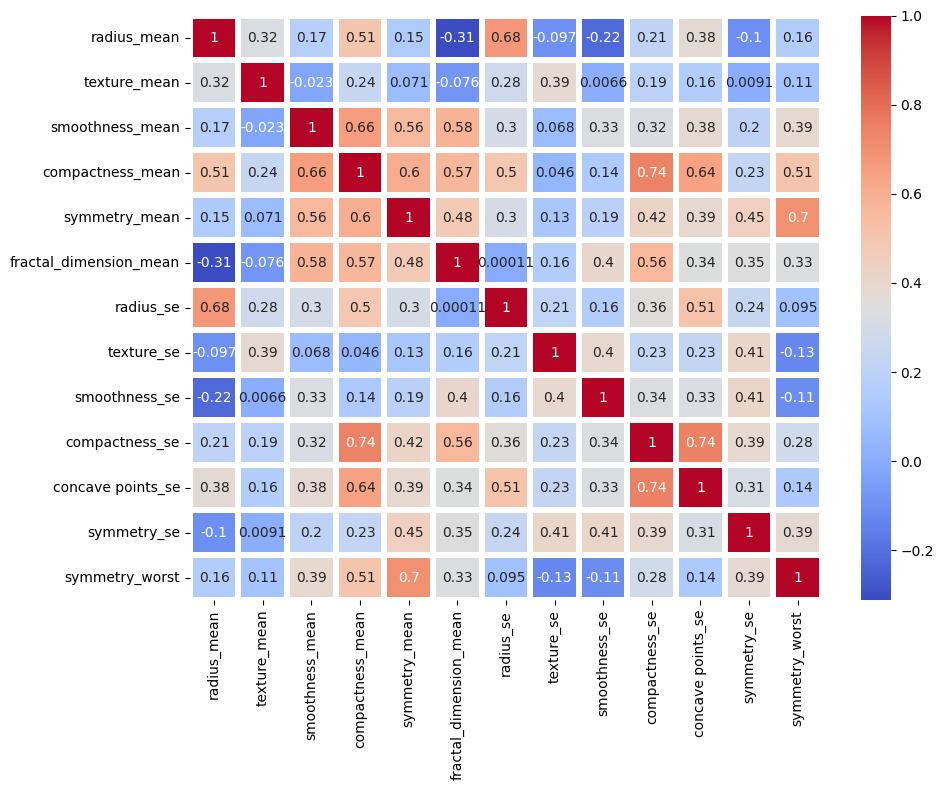

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', linewidths=3)
plt.tight_layout()

In [ ]:
df.diagnosis.replace({'B':0,'M':1}, inplace = True)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_reduced =df_reduced.drop(['diagnosis'], axis =1)

In [ ]:
X = df_reduced
y =df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state = 10)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()

In [ ]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   smoothness_mean         569 non-null    float64
 3   compactness_mean        569 non-null    float64
 4   symmetry_mean           569 non-null    float64
 5   fractal_dimension_mean  569 non-null    float64
 6   radius_se               569 non-null    float64
 7   texture_se              569 non-null    float64
 8   smoothness_se           569 non-null    float64
 9   compactness_se          569 non-null    float64
 10  concave points_se       569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  symmetry_worst          569 non-null    float64
dtypes: float64(13)
memory usage: 57.9 KB


In [ ]:
# Defining a function to plot the Receiver Operating Characteristic (ROC) curve
def plot_roc_curve(y_true, y_scores):
    # Calculate the false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, _ = roc_curve(y_true, y_scores)

    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_true, y_scores)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
    #plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

[[90  0]
 [ 4 49]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

ROC_AUC Score :  96.23%


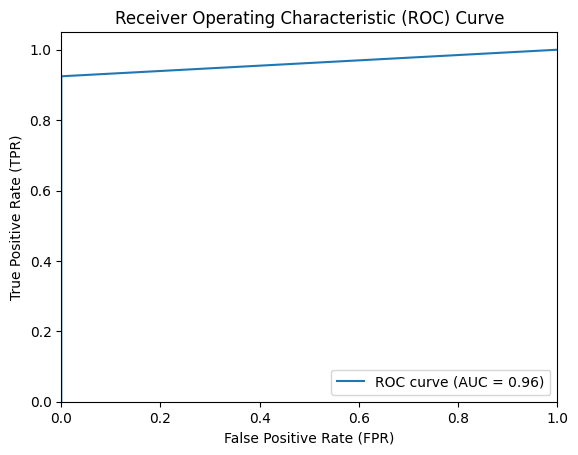

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,predictions)))
plot_roc_curve(y_test, predictions)

[[87  3]
 [ 3 50]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

ROC_AUC Score :  95.50%


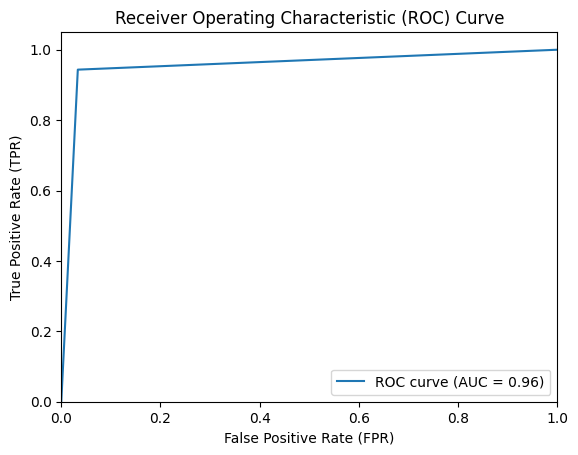

In [ ]:
Rf.fit(X_train, y_train)
predictions = Rf.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,predictions)))
plot_roc_curve(y_test, predictions)

[[89  1]
 [ 2 51]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.98      0.96      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

ROC_AUC Score :  97.56%


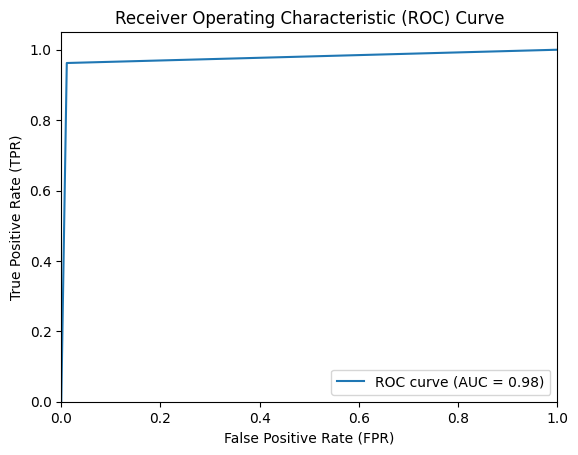

In [ ]:
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,predictions)))
plot_roc_curve(y_test, predictions)

[[84  6]
 [ 4 49]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        90
           1       0.89      0.92      0.91        53

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143

ROC_AUC Score :  92.89%


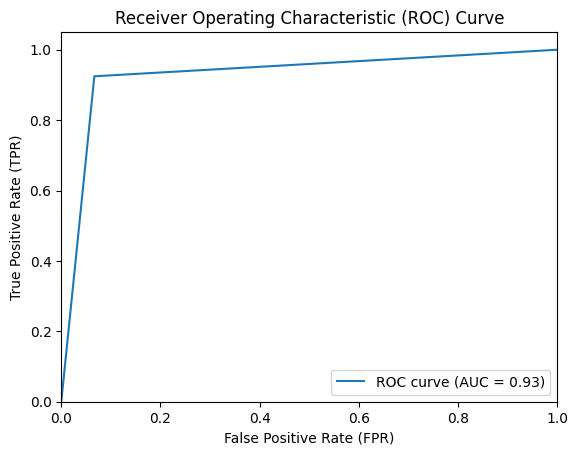

In [ ]:
Dt_model = DecisionTreeClassifier(max_depth = 7)
Dt_model.fit(X_train, y_train)
predictions = Dt_model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,predictions)))
plot_roc_curve(y_test, predictions)

[[88  2]
 [ 7 46]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        90
           1       0.96      0.87      0.91        53

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143

ROC_AUC Score :  92.29%


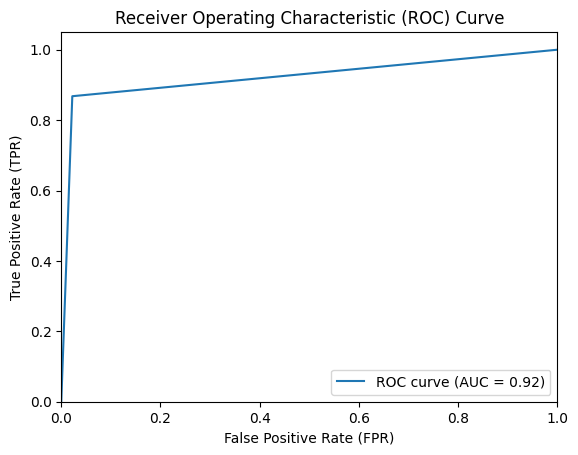

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,predictions)))
plot_roc_curve(y_test, predictions)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
ensemble_model = VotingClassifier(estimators=[
    ('model1', svm),
    ('model2', Rf),
    ('model3', lr)],
    voting='hard')

In [ ]:
scores = cross_val_score(ensemble_model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.04)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

In [ ]:
model.fit(X_train, y_train)

ExtraTreesClassifier()

In [ ]:
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[88  2]
 [ 3 50]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

